#### The objective of this project is to answer: What is it that people want to learn about in data science?
To answer this we will use a website that has data science question and answers. The website is stack exchange.
In here: https://data.stackexchange.com/datascience/query/new, we can do queries to explore the databases they have, like this one:

SELECT Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
FROM Posts
WHERE CreationDate LIKE '%2019%';

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

In [2]:
# read csv
questions = pd.read_csv("C://Users//johng//Desktop//data//2019_questions.csv", encoding='utf-8')

In [3]:
questions.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,53728,1,2019-06-13 17:23:56,1,45.0,<python><pandas><data>,1.0,1.0
1,53729,2,2019-06-13 17:31:39,0,NaN,NaN,NaN,NaN
2,53730,1,2019-06-13 17:37:57,1,91.0,<machine-learning><deep-learning><random-fores...,2.0,1.0
3,53731,2,2019-06-13 17:40:13,4,NaN,NaN,NaN,NaN
4,53732,1,2019-06-13 17:49:40,0,45.0,<multilabel-classification>,1.0,NaN


In [4]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14646 entries, 0 to 14645
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             14646 non-null  int64  
 1   PostTypeId     14646 non-null  int64  
 2   CreationDate   14646 non-null  object 
 3   Score          14646 non-null  int64  
 4   ViewCount      6758 non-null   float64
 5   Tags           6758 non-null   object 
 6   AnswerCount    6758 non-null   float64
 7   FavoriteCount  1730 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 915.5+ KB


In [5]:
#Clean the Tags column and assign it back to itself
questions["Tags"] = questions["Tags"].str.replace("^<","").str.replace(">$","").str.split("><")
questions["Tags"].head()

0                               [python, pandas, data]
1                                                  NaN
2    [machine-learning, deep-learning, random-fores...
3                                                  NaN
4                          [multilabel-classification]
Name: Tags, dtype: object

In [6]:
#Fill the missing values with ""
questions["Tags"].fillna("",inplace = True)

In [7]:
questions["Tags"]

0                                   [python, pandas, data]
1                                                         
2        [machine-learning, deep-learning, random-fores...
3                                                         
4                              [multilabel-classification]
                               ...                        
14641                                                     
14642                                                     
14643                                                     
14644                                                     
14645                                                     
Name: Tags, Length: 14646, dtype: object

In [8]:
#Count how many times each tag was used.
tag_count = dict()
for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
#converts dictionary into a DataFrame         
tag_count_df = pd.DataFrame.from_dict(tag_count, orient = "index")
tag_count_df.rename(columns = {0:"counts"}, inplace = True)
tag_count_df.head()

#sort values in ascending mode
most_used_tags = tag_count_df.sort_values("counts", ascending = False).head(20)
most_used_tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, machine-learning to data-mining
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   counts  20 non-null     int64
dtypes: int64(1)
memory usage: 320.0+ bytes


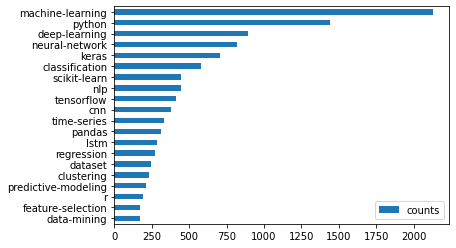

In [9]:
#Create visualization for most used tags
ax = most_used_tags.plot.barh()
ax.invert_yaxis()
plt.show()

In [10]:
#Count how many times each tag was viewed
tag_views = dict()
for index, row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in tag_views:
            tag_views[tag] += row["ViewCount"]
        else:
            tag_views[tag] = row["ViewCount"]

#converts dictionary into a DataFrame         
tag_views_df = pd.DataFrame.from_dict(tag_views, orient = "index")
tag_views_df.rename(columns = {0:"views"}, inplace = True)
tag_views_df.head()

#sort values in ascending mode
most_viewed_tags = tag_views_df.sort_values("views", ascending = False ).head(20)
most_viewed_tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, python to csv
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   views   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes


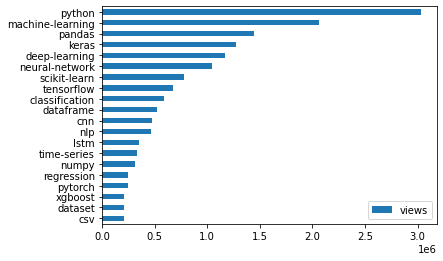

In [11]:
#Create visualization for most viewed tags
ax2 = most_viewed_tags.plot.barh()
ax2.invert_yaxis()
plt.show()

In [12]:
# most used tag vs most viewed tag with the COUNT relevance (how="left")
in_used_left = pd.merge(most_used_tags, most_viewed_tags, how="left", left_index=True, right_index=True)

In [13]:
# most used tag vs most viewed tag with the MOSTVIEWED relevance (how="right")?
in_used_right = pd.merge(most_used_tags, most_viewed_tags, how="right", left_index=True, right_index=True)

In [14]:
in_used_left.head()

,counts,views
machine-learning,2128,2058629.0
python,1440,3031143.0
deep-learning,895,1165715.0
neural-network,819,1043623.0
keras,706,1270782.0


In [15]:
in_used_right.head()

,counts,views
python,1440.0,3031143.0
machine-learning,2128.0,2058629.0
pandas,315.0,1445443.0
keras,706.0,1270782.0
deep-learning,895.0,1165715.0


#### Now, we are going to study if "deep learning" is just a buzz word or not. 
#### We can see all questions tags, using this query (we are going to use the same website we used in the beginning of this project):
    SELECT Id, CreationDate, Tags
     FROM Posts
     WHERE PostTypeId = 1;
#### PostTypeId: An identification number for the type of post, where:
    1 = question, 2 = answer, 3 = wiki, 4 = TagWikiExcerpt, 5 = TagWiki, 6 = ModeratorNomination, 7 = WikiPlaceholder, 8 = PrivilegeWiki.    

In [16]:
# read csv
deep = pd.read_csv("C://Users//johng//Desktop//data//all_questions.csv", encoding='utf-8')

In [17]:
deep.head()

,Id,CreationDate,Tags
0,80698,2020-08-23 15:41:14,<deep-learning><gradient-descent><backpropagat...
1,80709,2020-08-24 02:28:59,<scikit-learn><cross-validation><training>
2,80710,2020-08-24 03:33:39,<machine-learning><data-science-model><features>
3,80711,2020-08-24 04:28:54,<machine-learning><deep-learning><nlp><unsuper...
4,80714,2020-08-24 05:59:11,<predictive-modeling><cross-validation><conver...


In [18]:
#Clean the Tags column and assign it back to itself
deep["Tags"] = deep["Tags"].str.replace("^<|>$","").str.split("><")
deep.head(10)

,Id,CreationDate,Tags
0,80698,2020-08-23 15:41:14,"[deep-learning, gradient-descent, backpropagat..."
1,80709,2020-08-24 02:28:59,"[scikit-learn, cross-validation, training]"
2,80710,2020-08-24 03:33:39,"[machine-learning, data-science-model, features]"
3,80711,2020-08-24 04:28:54,"[machine-learning, deep-learning, nlp, unsuper..."
4,80714,2020-08-24 05:59:11,"[predictive-modeling, cross-validation, conver..."
5,80716,2020-08-24 06:28:49,"[machine-learning, data]"
6,80727,2020-08-24 13:27:36,"[feature-selection, feature-engineering, featu..."
7,80729,2020-08-24 14:06:32,"[neural-network, deep-learning, lstm, nlp, gan]"
8,80730,2020-08-24 14:08:20,"[machine-learning, classification, logistic-re..."
9,80731,2020-08-24 14:19:01,"[feature-selection, feature-engineering, predi..."


In [19]:
#Fill the missing values with ""
deep["Tags"].fillna("",inplace = True)

In [21]:
#Identify the questions that have a deep-learning tag on them
deep["DL-flag"] = deep["Tags"].apply(lambda x: "deep-learning" in x)

In [32]:
#Selecting questions with a Deep Learning Tagb
DLQuestions = deep[deep["DL-flag"]==True]
DLQuestions.info()
DLQuestions.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4375 entries, 0 to 32546
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            4375 non-null   int64 
 1   CreationDate  4375 non-null   object
 2   Tags          4375 non-null   object
 3   DL-flag       4375 non-null   bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 141.0+ KB


,Id,CreationDate,Tags,DL-flag
0,80698,2020-08-23 15:41:14,"[deep-learning, gradient-descent, backpropagat...",True
3,80711,2020-08-24 04:28:54,"[machine-learning, deep-learning, nlp, unsuper...",True
7,80729,2020-08-24 14:06:32,"[neural-network, deep-learning, lstm, nlp, gan]",True
18,80754,2020-08-24 22:49:15,"[deep-learning, sequence]",True
19,80756,2020-08-25 01:28:27,"[python, deep-learning, machine-learning-model...",True


In [38]:
#Creating a frequency table of years and months
YearQ = dict()
for date in DLQuestions["CreationDate"]:
    CurrentYear = date.year
    CurrentMonth = date.month
    if CurrentMonth < 4:
        CurrentQ = 1
    elif CurrentMonth < 7:
        CurrentQ = 2
    elif CurrentMonth < 10:
        CurrentQ = 3
    else: 
        CurrentQ = 4
    CurrentDate = CurrentYear*100 + CurrentQ
    if CurrentDate in YearQ:
        YearQ[CurrentDate] +=1
    else:
        YearQ[CurrentDate] = 1

AttributeError: 'str' object has no attribute 'year'